# Analysis of No-Show Medical Appointments in Brazil 
<a id='top'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Import Data and Libraries</a></li>
<li><a href="#examine">Data Exploration</a></li>    
<li><a href="#cleaning">Data Cleaning</a></li>       
<li><a href="#wrangling">Data Wrangling and Feature Engineering</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#machinelearning">Machine Learning</a></li>    
<li><a href="#testing">Model Predictions</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
### Introduction

Medical facilities around the world have a common problem: patients who miss their appointments without prior notice to the facility. This is commonly referred to as a “no-show”.
These facilities need to have a method to predict and mitigate the impact of these no-show appointments.  There are many reasons that could cause a patient to miss their appointment, and one such factor could be long date intervals between the date the appointment is created and the date of the appointment itself. 

This project examined the factors that contributed to a patient missing their appointment, with particular interest in the effect of the date interval on appointment attendance, and generated a machine learning model that can be used to predict which patients may no-show.    



<a href="#top">Back to Table of Contents</a>

<a id='import'></a>
### Import libraries and data

The data used in this project can be obtained from Kaggle.com at [this link.](https://www.kaggle.com/datasets/joniarroba/noshowappointments)


<a href="#top">Back to Table of Contents</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='examine'></a>
### Data Exploration
<a href="#de_findings">Jump to findings from Data Exploration</a>

<a href="#top">Back to Table of Contents</a>

In [3]:
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Evaluating for duplicates

In [5]:
sum(df.duplicated())

0

In [6]:
df.AppointmentID.duplicated().sum()

0

In [7]:
df.PatientId.duplicated().sum()

48228

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.Gender.value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [11]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

Calculating the overall no show rate

In [12]:
no_show_rate_all= df[df['No-show'] == 'Yes'].count()/df['No-show'].count()
no_show_rate_all.PatientId

0.20193255946510807

<a id='de_findings'></a>
Findings during initial data exploration:
- There are 48228 repeating PatientIds,  this likely represents the patients having multiple appointments during this time frame, but could represent duplicated appointments that have differing AppointmentID numbers.  
- The naming convention for the columns is irregular and columns will need to be renamed to standardize naming. 
- The column labels "Hipertension" and "Handcap" could be spelling errors vs regional terms or language differences.  I opted to leave these as is rather than correcting to American English spelling/terminology.  
- ScheduledDay and AppointmentDay are string datatypes, and need to be converted to DateTime.
- There is one negative age that will need to be addressed.  
- PatientId column and AppointmentID are float and integer data types respectively, as identifiers they should be converted to string as they are not numerical values.  However, having determined there are no duplicate AppointmentIDs, this column is not necessary for analysis and will be dropped. 
- The AppointmentDay values all have a time of 00:00,  so the actual times are likely missing from this data set, this will be addressed during Data Wrangling by also setting ScheduledDay to 00:00. 
- The PatientIDs are potential patient identifiers,  I will anonymize these before proceeding with other steps. 
- Both 'NoShow' and 'Gender' columns need to be converted to binary values for analysis.
- 20.2% of appointments are no shows. 



<a id='cleaning'></a>
### Data Cleaning

<a href="#df_findings">Jump to summary of data cleaning steps taken</a>


<a href="#top">Back to Table of Contents</a>


Anonymizing the patient ID, then exporting to a new .csv file and reloading that file.  In the event I had extracted this patient data, this step would be done outside of this notebook and only the .csv with anonymized patient IDs would be loaded. However, because this data is publicly available, I have done this for demonstration purposes inside this notebook.  

In [13]:
import hashlib
#Anonymize PatientID

df['PatientId']= df['PatientId'].astype(str)
df['PatientId']=df.PatientId.str[:-2]
df['PatientId'] = df['PatientId'].apply(
lambda x: 
    int(hashlib.sha256(x.encode()).hexdigest(), 16)) % 10**16



In [14]:
df.PatientId.duplicated().sum()

48228

In [15]:
df.to_csv('anon_noshowappointments-kagglev2-may-2016.csv')

In [16]:
df=pd.read_csv('anon_noshowappointments-kagglev2-may-2016.csv', index_col= 0)

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2944076405156631,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,7786344176630077,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4300258968658637,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,6000032656652126,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,9716721353700278,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I created a data cleaning function that can be reused if a new data set in the same format is loaded. 

In [18]:
def clean_data(df):
    pd.options.mode.copy_on_write = True
    
    #Renaming columns to match naming convention in other columns
    df.rename(columns={'SMS_received': 'SMSReceived'}, inplace=True)
    df.rename(columns={'No-show': 'NoShow'}, inplace=True)
    df.rename(columns={'PatientId': 'PatientID'}, inplace=True)
    
    #Convert ScheduledDay and AppointmentDay to datetime datatype
    df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
    df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
    
    #Ensure only ages of 0 or greater are included in the incoming data
    df= df[df['Age'] >= 0]
    

    #Drop AppointmentID column
    df.drop(['AppointmentID'], axis=1, inplace=True )

    #Convert PatientID to String datatype.

    df['PatientID']= df['PatientID'].astype(str)
   
    
    return df
    

In [19]:
df=clean_data(df)

This confirms that only one row was removed, AppointmentID was dropped, and the datatypes and column labels are now corrected. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  object             
 1   Gender          110526 non-null  object             
 2   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 4   Age             110526 non-null  int64              
 5   Neighbourhood   110526 non-null  object             
 6   Scholarship     110526 non-null  int64              
 7   Hipertension    110526 non-null  int64              
 8   Diabetes        110526 non-null  int64              
 9   Alcoholism      110526 non-null  int64              
 10  Handcap         110526 non-null  int64              
 11  SMSReceived     110526 non-null  int64              
 12  NoShow          110526 non-null  object             
dtypes: datetime64[ns, U

In [21]:
df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2944076405156631,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,7786344176630077,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4300258968658637,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,6000032656652126,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,9716721353700278,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are 618 duplicate rows that are identified after dropping AppointmentID, and these will be dropped. 

In [22]:
sum(df.duplicated())

618

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
sum(df.duplicated())

0

In [25]:
df.shape[0]

109908

I will also look at patients with multiple appointments on the same date to examine them in more detail. 

In [26]:
df_dups=df[df[['PatientID', 'AppointmentDay']].duplicated(keep=False)]

In [27]:
df_dups.head(10)

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2944076405156631,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,7786344176630077,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4300258968658637,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
21,8821884098248722,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes
27,8821884098248722,F,2016-04-27 10:51:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No
77,1244812021092159,F,2016-04-29 17:06:27+00:00,2016-04-29 00:00:00+00:00,27,JABOUR,0,0,0,0,0,0,No
82,5432181898926358,M,2016-04-29 08:36:19+00:00,2016-04-29 00:00:00+00:00,71,JABOUR,0,0,0,0,0,0,No
86,5411058268953647,M,2016-04-18 12:31:34+00:00,2016-04-29 00:00:00+00:00,10,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
87,2960468144229026,M,2016-04-18 12:32:25+00:00,2016-04-29 00:00:00+00:00,2,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
88,2026120346986619,M,2016-04-18 12:32:35+00:00,2016-04-29 00:00:00+00:00,1,JUCUTUQUARA,0,0,0,0,0,0,No


In [28]:
df_dups.loc[(df_dups['PatientID'] == '8821884098248722')]

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
21,8821884098248722,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes
27,8821884098248722,F,2016-04-27 10:51:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No
51197,8821884098248722,F,2016-05-02 11:16:02+00:00,2016-05-05 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No
51200,8821884098248722,F,2016-05-09 16:02:48+00:00,2016-05-19 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes
68608,8821884098248722,F,2016-04-25 14:53:10+00:00,2016-05-05 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,1,No
68610,8821884098248722,F,2016-05-09 16:02:03+00:00,2016-05-19 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes


In [29]:
df_dups.loc[(df_dups['PatientID'] == '2960468144229026')]

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
87,2960468144229026,M,2016-04-18 12:32:25+00:00,2016-04-29 00:00:00+00:00,2,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
2829,2960468144229026,M,2016-03-15 16:21:10+00:00,2016-04-29 00:00:00+00:00,2,ILHA DE SANTA MARIA,0,0,0,0,0,1,Yes


In [30]:
df_dups.loc[(df_dups['PatientID'] == '4300258968658637')]

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
2,4300258968658637,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
1156,4300258968658637,F,2016-04-29 09:51:10+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [31]:
df_dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15097 entries, 0 to 110515
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientID       15097 non-null  object             
 1   Gender          15097 non-null  object             
 2   ScheduledDay    15097 non-null  datetime64[ns, UTC]
 3   AppointmentDay  15097 non-null  datetime64[ns, UTC]
 4   Age             15097 non-null  int64              
 5   Neighbourhood   15097 non-null  object             
 6   Scholarship     15097 non-null  int64              
 7   Hipertension    15097 non-null  int64              
 8   Diabetes        15097 non-null  int64              
 9   Alcoholism      15097 non-null  int64              
 10  Handcap         15097 non-null  int64              
 11  SMSReceived     15097 non-null  int64              
 12  NoShow          15097 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7)

In [32]:
df_dups.NoShow.value_counts()

NoShow
No     11897
Yes     3200
Name: count, dtype: int64

In [33]:
no_show_rate_a= df_dups[df_dups['NoShow'] == 'Yes'].count()/df_dups.NoShow.count()
no_show_rate_a.PatientID

0.21196264158442074

In [34]:
df_dups2=df[df[['PatientID', 'AppointmentDay']].duplicated()]

In [35]:
df_dups2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 27 to 110515
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientID       8101 non-null   object             
 1   Gender          8101 non-null   object             
 2   ScheduledDay    8101 non-null   datetime64[ns, UTC]
 3   AppointmentDay  8101 non-null   datetime64[ns, UTC]
 4   Age             8101 non-null   int64              
 5   Neighbourhood   8101 non-null   object             
 6   Scholarship     8101 non-null   int64              
 7   Hipertension    8101 non-null   int64              
 8   Diabetes        8101 non-null   int64              
 9   Alcoholism      8101 non-null   int64              
 10  Handcap         8101 non-null   int64              
 11  SMSReceived     8101 non-null   int64              
 12  NoShow          8101 non-null   object             
dtypes: datetime64[ns, UTC](2), int64(7)

In [36]:
df_dups2.NoShow.value_counts()

NoShow
No     6420
Yes    1681
Name: count, dtype: int64

In [37]:
no_show_rate_b= df_dups2[df_dups2['NoShow'] == 'Yes'].count()/df_dups2.NoShow.count()
no_show_rate_b.PatientID

0.2075052462658931

There are 15,097 appointments that have duplicated PatientID and AppointmentDay, of those 8101 represent a second (or more) appointment for the same date as the first.  This could represent true duplication, or it could represent patients who have multiple appointments in one day.   The incidence of no shows in this group is not significantly higher than the entire data set, and I will leave these rows in place as they could represent patients with multiple appointments on the same date.  If this data were complete with appointment times, true duplication could be better determined. 

In [38]:
df.AppointmentDay.max()

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

In [39]:
df.AppointmentDay.min()

Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

The date range for this data set is 04-29-2016 to 06-08-2016

In [40]:
df.ScheduledDay.max()

Timestamp('2016-06-08 20:07:23+0000', tz='UTC')

In [41]:
df.ScheduledDay.min()

Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

The scheduled date range is 11-10-2015 to 06-08-2016

<a id='df_findings'></a>
Summary of Data Cleaning steps taken:
- PatientId was hashed to anonymize the ID number, exported to a new csv and imported as df. 
- Three columns, SMS_received, No-show, and PatientId were renamed to match naming convention of other columns
- ScheduledDay and AppointmentDay were converted to Datetime datatype
- Any rows with ages below 0 were dropped from the data set
- The AppointmentID column was dropped
- 618 duplicate rows that became evident after AppointmentID was dropped were removed from the data set. 
- PatientID was converted to string type. 
- There are 8101 duplications of PatientID and AppointmentDay, however these could represent patients with multiple appointments on the same date. With the absence of appointment times it is difficult to ascertain if these are true duplicates.  The no show rate for these possible duplicates is 20.7%, slightly higher than the overall no show rate of 20.2%,  so I have left these in the data frame. 


Code references used for this section:
- [Anonymizing Patient IDs]( https://towardsdatascience.com/anonymise-sensitive-data-in-a-pandas-dataframe-column-with-hashlib-8e7ef397d91f)
- [Hashing Strings into set number of digits](https://stackoverflow.com/questions/16008670/how-to-hash-a-string-into-8-digits)

<a href="#top">Back to Table of Contents</a>


<a id='wrangling'></a>
### Data Wrangling and Feature Engineering

<a href="#dw_fe">Jump to summary of Wrangling and Feature Engineering steps taken</a>


<a href="#top">Back to Table of Contents</a>

In [42]:
import hashlib
def data_wrangle(df):
    
    #Encode No/Yes values to 0 and 1.  1 means the patient was a no show. 
    df['NoShow']=df.NoShow.replace(to_replace=['No', 'Yes'], value=[0, 1])
    
    #Encode Gender to 0 and 1 for F and M
    df['Gender']=df.Gender.replace(to_replace=['F', 'M'], value=[0, 1])  
    
    #Setting the times to 00:00 as one column uses actual times and the other only uses 00:00
    df['AppointmentDay']=df['AppointmentDay'].dt.floor('d')
    df['ScheduledDay']=df['ScheduledDay'].dt.floor('d')   
    
    
    return df
    

In [43]:
df=data_wrangle(df)

In [44]:
df.sample(10)

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
74989,8743891746965146,0,2016-05-16 00:00:00+00:00,2016-05-16 00:00:00+00:00,7,ILHA DAS CAIEIRAS,1,0,0,0,0,0,0
71789,9590031300535943,1,2016-05-12 00:00:00+00:00,2016-05-12 00:00:00+00:00,55,PARQUE MOSCOSO,0,0,0,0,0,0,1
10290,9603038331909113,0,2016-04-18 00:00:00+00:00,2016-05-20 00:00:00+00:00,57,CRUZAMENTO,0,1,0,0,0,0,0
30450,3684922440649198,0,2016-04-29 00:00:00+00:00,2016-05-30 00:00:00+00:00,37,CENTRO,0,0,0,0,0,1,1
76665,5551560997264919,0,2016-05-20 00:00:00+00:00,2016-05-20 00:00:00+00:00,22,ANDORINHAS,0,0,0,0,0,0,0
48616,9191120532843662,1,2016-05-03 00:00:00+00:00,2016-05-12 00:00:00+00:00,49,JARDIM DA PENHA,0,1,0,0,0,1,0
21619,2808153507517406,0,2016-05-10 00:00:00+00:00,2016-05-20 00:00:00+00:00,66,SANTO ANDRÉ,0,1,1,0,0,0,1
85730,4427963142681890,0,2016-06-03 00:00:00+00:00,2016-06-03 00:00:00+00:00,4,BELA VISTA,1,0,0,0,0,0,0
8957,1267009873383396,0,2016-05-19 00:00:00+00:00,2016-05-19 00:00:00+00:00,37,MÁRIO CYPRESTE,0,0,0,0,0,0,0
69028,6875044903805211,0,2016-04-15 00:00:00+00:00,2016-05-10 00:00:00+00:00,3,CARATOÍRA,0,0,0,0,0,0,0


In [45]:
no_show_rate_all= df[df['NoShow'] == 1].count()/df['NoShow'].count()
no_show_rate_all.PatientID

0.20112275721512538

In [46]:
df.Gender.value_counts()

Gender
0    71423
1    38485
Name: count, dtype: int64

In [47]:
df.NoShow.value_counts()

NoShow
0    87803
1    22105
Name: count, dtype: int64

In [48]:
def feature_engineering(df):
    #Creating new columns for date/time features    
    df['ApptWeekday'] = df['AppointmentDay'].dt.dayofweek  
    df['SchedWeekday'] = df['ScheduledDay'].dt.dayofweek
    
    #Create DateInterval Column
    df['DateInterval']=(df['AppointmentDay']-df['ScheduledDay']).dt.days
       
    #Create Comorbidity Score
    df['ComorbidityScore'] = df['Hipertension'] + df['Diabetes']+ df['Alcoholism']+ df['Handcap']
    
    #Create Appointment Count, Count of No Shows, and No Show Rate    
    df['CountNoShow']= df['NoShow'].groupby(df['PatientID']).transform('sum')
    df['ApptCount']= df.groupby(['PatientID'])['NoShow'].transform('count')
    df['NoShowRate']= df['CountNoShow']/df['ApptCount']
    
    return df

In [49]:
df=feature_engineering(df)

In [50]:
df.DateInterval.describe()

count    109908.000000
mean         10.156413
std          15.250850
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DateInterval, dtype: float64

In [51]:
df[df['DateInterval'] < 0]

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
27033,724571764322116,1,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,0,1,-1,1,1,5,0.200000
55226,4743260106071849,0,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,1,2,-1,1,2,8,0.250000
64175,9657260021380511,0,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,2,3,-1,0,2,2,1.000000
71533,3114765677065384,0,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,3,2,-6,0,2,3,0.666667
72362,2088651208073063,1,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,1,2,-1,0,1,5,0.200000


There are 5 appointments with a DateInterval less than 0.  This likely represents human error, but the true values cannot be identified.  As this represents a very small fraction of the dataset, these will be removed. 

In [52]:
#Remove any rows with DateInterval less than 0 
df= df[df['DateInterval']>= 0]
    

<a id='dw_fe'></a>

Data Wrangling steps taken:
- The AppointmentDay values all have a time of 00:00, so the actual times are likely missing from this data set, this will be addressed during Data Wrangling by also setting ScheduledDay to 00:00.
- The PatientIDs are potential patient identifiers, I will anonymize these in the data wrangling phase.
- Both 'NoShow' and 'Gender' columns need to be converted to binary values for analysis.

Feature Engineering steps taken:
- I will create a DateInterval feature, which is the time difference between the ScheduledDay and AppointmentDay.  
- I will create features for the Scheduled Weekday and Appointment Weekday to evaluate impact of day of the week for both sheduling and appointment on attendance.
- I will create a ComorbidityScore feature.  This is a sum of values from Hipertension, Diabetes, Alcoholism, and Handcap columns for each row.
- I will create a feature for total number of appointments a patient has had, and their count of NoShows in the dataset. I will create a feature called NoShowRate to calculate historical appointment non-attendance rate. 

Code references used for this section:

- [Create a new column with groupby results](https://stackoverflow.com/questions/30244952/how-do-i-create-a-new-column-from-the-output-of-pandas-groupby-sum)


<a href="#top">Back to Table of Contents</a>

<a id='eda'></a>
### Exploratory Data Analysis
<a href="#eda_sum">Jump to findings from Exploratory Data Analysis</a>


<a href="#top">Back to Table of Contents</a>

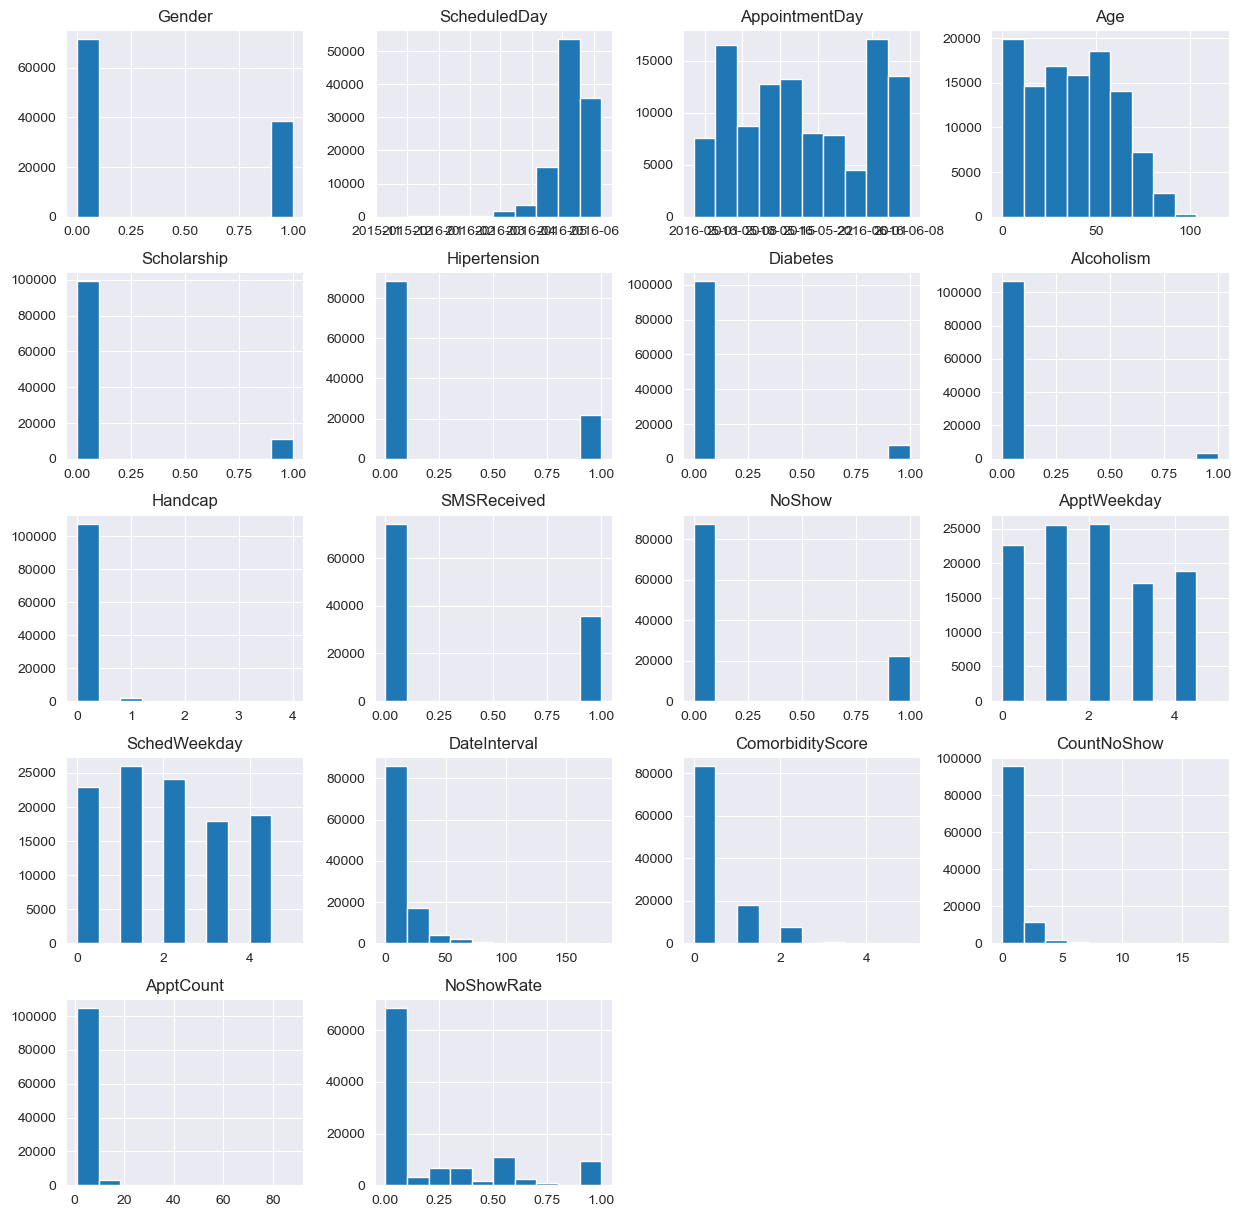

In [53]:
df.hist(figsize=(15,15));

In [54]:
def bar_graph(df,column1, column2,  ylabel, xlabel):
    '''
    docstring:  This function creates a bar graph with grouped bars with different colors for Show and No Show.  This will calculate the proportions of
    show and no show for the variable and display them as a percent on the y axis. 
    Inputs: The dataframe (df), column1 and column2 are the column names to be analyzed in the graph, column1 should generally be 'NoShow' for this purpose
    ylabel and xlabel are labels for the y and x axis.
    This will also generate a graph title of '{xlabel} of attendance'
    
    '''
    count=df.groupby([column1, column2],observed=True).count()['Gender']
    count.unstack(column1).div(df[column2].value_counts(), axis=0).mul(100).plot.bar()
    
    plt.title(f'{xlabel} and appointment attendance'.title(), fontsize= 14, weight= 'bold')	
    plt.ylabel(f'{ylabel} of Attendance'.title(), fontsize=12, weight= 'bold')
    plt.xlabel(xlabel.title(), fontsize=12, weight= 'bold')
    plt.legend(['Show', 'No Show'])
   

In [55]:
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
count,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000
mean,0.350154,37.086986,0.098287,0.197247,0.071818,0.030427,0.022110,0.322848,0.201086,1.857747,1.851396,10.156966,0.321602,0.621694,3.511342,0.201111
std,0.477020,23.121169,0.297703,0.397922,0.258187,0.171759,0.160816,0.467567,0.400814,1.370939,1.378303,15.250971,0.631096,1.125491,6.558450,0.313325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,15.000000,0.000000,1.000000,4.000000,0.333333
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000,5.000000,179.000000,5.000000,18.000000,88.000000,1.000000


Next, I examine DateInterval

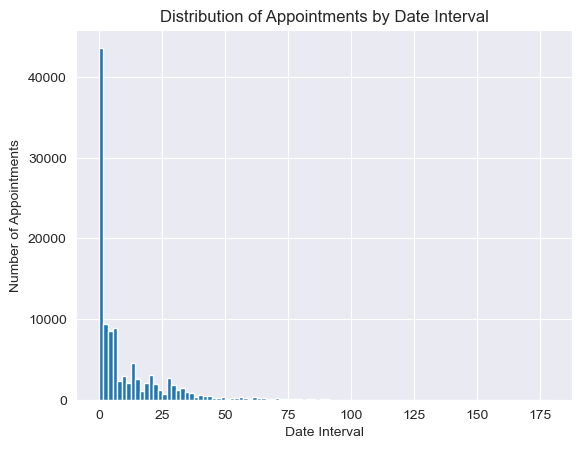

In [56]:
df.DateInterval.hist(bins=100)
plt.title('Distribution of Appointments by Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Number of Appointments');

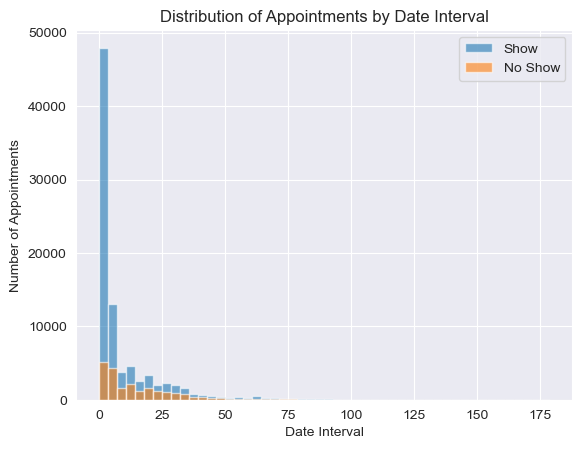

In [57]:
show=df.NoShow == 0
noshow= df.NoShow == 1

df.DateInterval[show].hist(alpha= 0.6, bins=50, label='Show')
df.DateInterval[noshow].hist(alpha= 0.6, bins=50, label='No Show')
plt.title('Distribution of Appointments by Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Number of Appointments')
plt.legend();

It appears there are a lower rate of No Shows on 0 date intervals, these represent appointments scheduled on the same date of the actual appointment, and may represent walkins or urgent visits. 

Below I examine the show/no show counts and rates by date interval.

In [58]:
pd.set_option("display.max_rows", None)
df.groupby('DateInterval',observed=True)['NoShow'].value_counts().unstack('NoShow')

NoShow,0,1
DateInterval,,
0,36711.0,1783.0
1,4063.0,1099.0
2,5103.0,1595.0
3,2076.0,635.0
4,4046.0,1223.0
5,2402.0,862.0
6,3016.0,999.0
7,3563.0,1299.0
8,1644.0,666.0


In [59]:
df.groupby('DateInterval',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
DateInterval,,
0,95.368109,4.631891
1,78.709802,21.290198
2,76.186921,23.813079
3,76.576909,23.423091
4,76.788764,23.211236
5,73.590686,26.409314
6,75.118306,24.881694
7,73.282600,26.717400
8,71.168831,28.831169


I created a copy of the data frame to examine of date interval by date groups without impacting the original dataframe. 

In [60]:
df_date = df.copy()

In [61]:
custom_bin_days = pd.IntervalIndex.from_tuples([(-1,0),(0,9),(9,30), (30,60),(60,180)])
bin_names_days=['Same Day','1-9 days','10-30 days','31-60 days','61-180 days']
df_date['DateInterval']=pd.cut(df_date['DateInterval'], custom_bin_days, labels=bin_names_days)
df_date['DateInterval'].cat.rename_categories(bin_names_days)
df_date.head(5)

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
0,2944076405156631,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,"(-1, 0]",1,0,2,0.0
1,7786344176630077,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,"(-1, 0]",0,0,2,0.0
2,4300258968658637,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,"(-1, 0]",0,0,2,0.0
3,6000032656652126,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4,"(-1, 0]",0,1,2,0.5
4,9716721353700278,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,"(-1, 0]",2,0,1,0.0


In [62]:
#bin labels above would not apply to the date interval bins and would only display the tuple so 
#I converted to string and replaced the label names that way. 
df_date['DateInterval']=df_date['DateInterval'].astype('str')

In [63]:
df_date['DateInterval']=df_date.DateInterval.replace(to_replace=['(-1, 0]', '(0, 9]', '(9, 30]', 
                                                                 '(30, 60]','(60, 180]'], 
                                                     value=['0 Same Day', '1-9 days','10-30 days','31-60 days','61-180 days'])

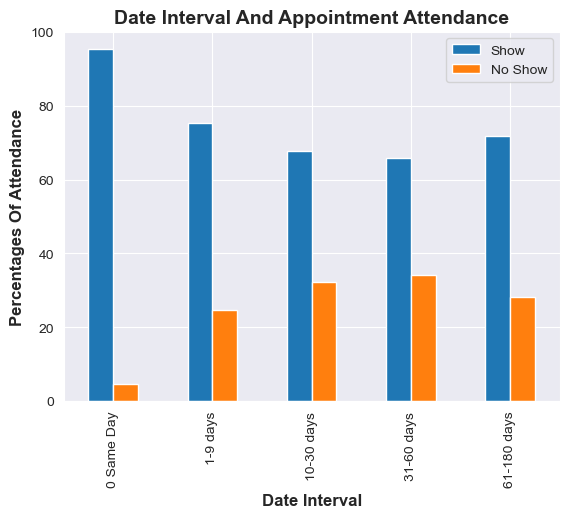

In [64]:
bar_graph(df_date,'NoShow', 'DateInterval',  'Percentages', 'Date Interval')

In [65]:
df_date.groupby('DateInterval',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
DateInterval,,
0 Same Day,95.368109,4.631891
1-9 days,75.438890,24.561110
10-30 days,67.830118,32.169882
31-60 days,65.922401,34.077599
61-180 days,71.716203,28.283797


In [66]:
df.DateInterval.describe()

count    109903.000000
mean         10.156966
std          15.250971
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DateInterval, dtype: float64

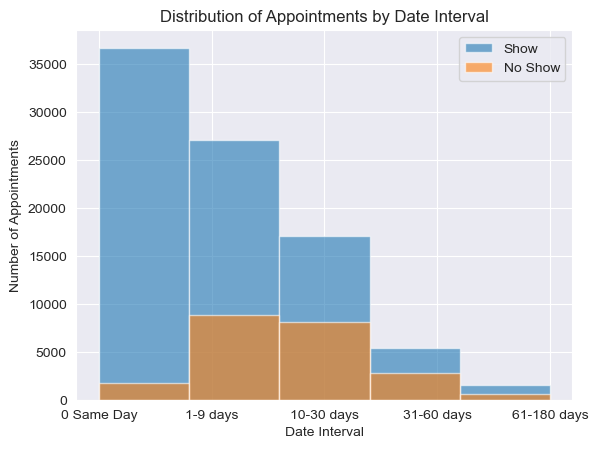

In [67]:
df_date.DateInterval[show].hist(alpha= 0.6, bins=5, label='Show')
df_date.DateInterval[noshow].hist(alpha= 0.6, bins=5, label='No Show')
plt.title('Distribution of Appointments by Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Number of Appointments')
plt.legend();

For further exploratory analyis, I created a dataframe that excludes same day appointments, and calculated the no show rate for this population.

In [68]:
df_multiday=df[df['DateInterval'] > 0]

In [69]:
no_show_rate_multi= df_multiday[df_multiday['NoShow'] == 1].count()/df_multiday.NoShow.count()
no_show_rate_multi.PatientID

0.28451595737232

In [70]:
df_sameday=df[df['DateInterval'] == 0]
no_show_rate_same= df_sameday[df_sameday['NoShow'] == 1].count()/df_sameday.NoShow.count()
no_show_rate_same.PatientID

0.046318906842624824

In [71]:
#Proportion of same day appointments in the data set. 
df_sameday.shape[0]/df.shape[0]

0.3502543151688307

Next, I'll examine the Age column. 

In [72]:
df.describe().Age

count    109903.000000
mean         37.086986
std          23.121169
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

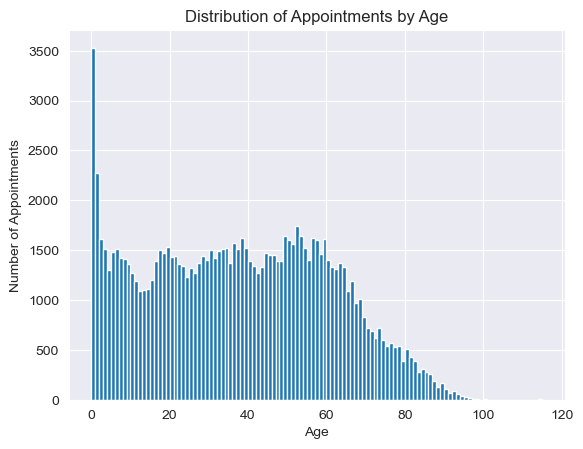

In [73]:
df.Age.hist(bins=115)
plt.title('Distribution of Appointments by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

In [74]:
df.Age.value_counts().sort_index()

Age
0      3530
1      2271
2      1616
3      1509
4      1297
5      1482
6      1512
7      1419
8      1413
9      1363
10     1266
11     1187
12     1089
13     1096
14     1114
15     1205
16     1392
17     1498
18     1474
19     1532
20     1428
21     1441
22     1366
23     1344
24     1233
25     1322
26     1273
27     1372
28     1440
29     1397
30     1505
31     1419
32     1488
33     1516
34     1518
35     1371
36     1567
37     1516
38     1623
39     1525
40     1393
41     1339
42     1268
43     1332
44     1474
45     1450
46     1451
47     1388
48     1392
49     1645
50     1601
51     1561
52     1738
53     1641
54     1523
55     1406
56     1623
57     1597
58     1459
59     1614
60     1403
61     1332
62     1307
63     1368
64     1327
65     1095
66     1186
67      972
68     1012
69      826
70      718
71      692
72      614
73      720
74      601
75      540
76      570
77      525
78      541
79      389
80      509
81      429
82      391


In [75]:
df.Age.describe()

count    109903.000000
mean         37.086986
std          23.121169
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There are 2 patients with an age listed as 115.  This is plausible, but could represent human error in data entry. As there are only 4 entries for these 2 patients, I will leave them as is. 

In [76]:
df.loc[(df['Age'] == 115)]

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
63912,8094031277472324,0,2016-05-16 00:00:00+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1,3,0,3,1,2,3,0.666667
68127,8094031277472324,0,2016-04-08 00:00:00+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1,0,4,38,1,2,3,0.666667
76284,8094031277472324,0,2016-05-30 00:00:00+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0,0,0,0,1,2,3,0.666667
97666,3896232229402843,0,2016-05-19 00:00:00+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,0,4,3,15,1,0,1,0.000000


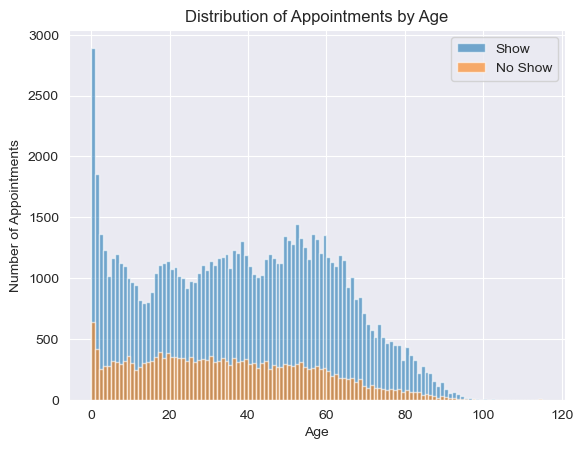

In [77]:
df.Age[show].hist(alpha= 0.6, bins=115, label='Show')
df.Age[noshow].hist(alpha= 0.6, bins=115, label='No Show')
plt.title('Distribution of Appointments by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend();

In [78]:
df.groupby('Age', observed= True)['NoShow'].value_counts(normalize=True).unstack('NoShow')

NoShow,0,1
Age,,
0,0.819830,0.180170
1,0.817261,0.182739
2,0.844059,0.155941
3,0.818423,0.181577
4,0.783346,0.216654
5,0.784750,0.215250
6,0.792989,0.207011
7,0.790698,0.209302
8,0.777070,0.222930


I will also examine age in age group bins to compare no show rates among age groups

In [79]:
df_age=df.copy()

In [80]:
custom_bins = [0, 17, 33, 51,115]
bin_names=['0-17','18-33','34-51','52-115']
df_age['Age']=pd.cut(df_age['Age'], custom_bins, labels=bin_names, right= True)
df_age.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
0,2944076405156631,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,52-115,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,0,1,0,2,0.0
1,7786344176630077,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,52-115,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,0,0,0,2,0.0
2,4300258968658637,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,52-115,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,0,0,0,2,0.0
3,6000032656652126,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0-17,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4,0,0,1,2,0.5
4,9716721353700278,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,52-115,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,0,2,0,1,0.0


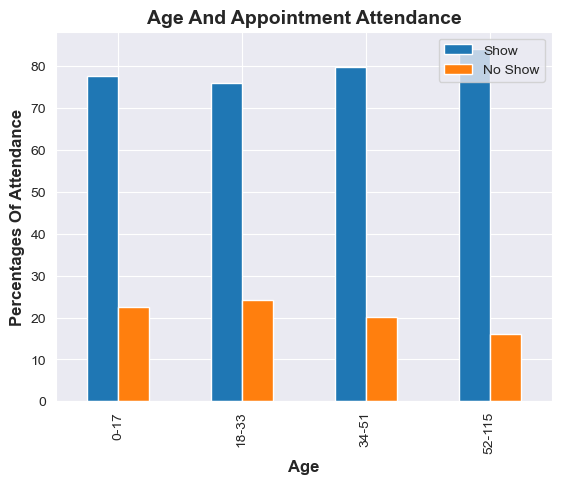

In [81]:
bar_graph(df_age,'NoShow', 'Age',  'Percentages', 'Age')

In [82]:
df_age.groupby('Age',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
Age,,
0-17,77.575962,22.424038
18-33,75.924612,24.075388
34-51,79.821307,20.178693
52-115,84.014252,15.985748


In [83]:
df_age.groupby('Age',observed=True)['NoShow'].value_counts().unstack('NoShow')

NoShow,0,1
Age,,
0-17,18408,5321
18-33,17121,5429
34-51,21084,5330
52-115,28296,5384


Next I will examine Neighbourhood

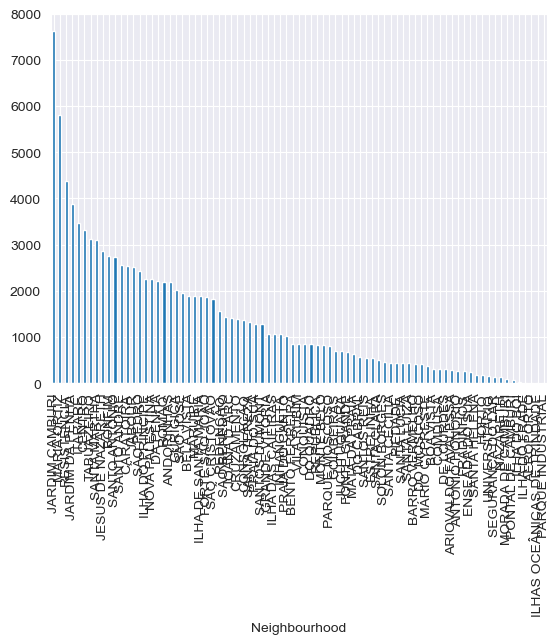

In [84]:
df.Neighbourhood.value_counts().plot.bar();

In [85]:
df.Neighbourhood.nunique()

81

In [86]:
df.Neighbourhood.value_counts(normalize=True)

Neighbourhood
JARDIM CAMBURI                 0.069343
MARIA ORTIZ                    0.052810
RESISTÊNCIA                    0.039908
JARDIM DA PENHA                0.035240
ITARARÉ                        0.031573
CENTRO                         0.030117
TABUAZEIRO                     0.028407
SANTA MARTHA                   0.028234
JESUS DE NAZARETH              0.025950
BONFIM                         0.025122
SANTO ANTÔNIO                  0.024849
SANTO ANDRÉ                    0.023257
CARATOÍRA                      0.023120
JABOUR                         0.022811
SÃO PEDRO                      0.022129
ILHA DO PRÍNCIPE               0.020618
NOVA PALESTINA                 0.020591
DA PENHA                       0.020045
ROMÃO                          0.019981
ANDORINHAS                     0.019963
GURIGICA                       0.018325
SÃO JOSÉ                       0.017861
BELA VISTA                     0.017233
MARUÍPE                        0.017206
ILHA DE SANTA MARIA       

In [87]:
df.Neighbourhood.value_counts()

Neighbourhood
JARDIM CAMBURI                 7621
MARIA ORTIZ                    5804
RESISTÊNCIA                    4386
JARDIM DA PENHA                3873
ITARARÉ                        3470
CENTRO                         3310
TABUAZEIRO                     3122
SANTA MARTHA                   3103
JESUS DE NAZARETH              2852
BONFIM                         2761
SANTO ANTÔNIO                  2731
SANTO ANDRÉ                    2556
CARATOÍRA                      2541
JABOUR                         2507
SÃO PEDRO                      2432
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2263
DA PENHA                       2203
ROMÃO                          2196
ANDORINHAS                     2194
GURIGICA                       2014
SÃO JOSÉ                       1963
BELA VISTA                     1894
MARUÍPE                        1891
ILHA DE SANTA MARIA            1885
FORTE SÃO JOÃO                 1867
SÃO CRISTÓVÃO                  1831
REDENÇÃO      

In [88]:
df.groupby('Neighbourhood',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
Neighbourhood,,
AEROPORTO,87.500000,12.500000
ANDORINHAS,77.347311,22.652689
ANTÔNIO HONÓRIO,81.549815,18.450185
ARIOVALDO FAVALESSA,77.857143,22.142857
BARRO VERMELHO,78.436019,21.563981
BELA VISTA,79.936642,20.063358
BENTO FERREIRA,77.868852,22.131148
BOA VISTA,81.410256,18.589744
BONFIM,80.152119,19.847881


here are some neighborhoods that appear very infrequently, I will replace the ones that appear less than 0.5% of the time with the name "Other".

In [89]:
df.loc[df.groupby('Neighbourhood')['PatientID']
         .transform('size')
         .div(len(df))
         .lt(0.005), 
       'Neighbourhood'] = 'Other'

In [90]:
df.Neighbourhood.value_counts()

Neighbourhood
Other                  7974
JARDIM CAMBURI         7621
MARIA ORTIZ            5804
RESISTÊNCIA            4386
JARDIM DA PENHA        3873
ITARARÉ                3470
CENTRO                 3310
TABUAZEIRO             3122
SANTA MARTHA           3103
JESUS DE NAZARETH      2852
BONFIM                 2761
SANTO ANTÔNIO          2731
SANTO ANDRÉ            2556
CARATOÍRA              2541
JABOUR                 2507
SÃO PEDRO              2432
ILHA DO PRÍNCIPE       2266
NOVA PALESTINA         2263
DA PENHA               2203
ROMÃO                  2196
ANDORINHAS             2194
GURIGICA               2014
SÃO JOSÉ               1963
BELA VISTA             1894
MARUÍPE                1891
ILHA DE SANTA MARIA    1885
FORTE SÃO JOÃO         1867
SÃO CRISTÓVÃO          1831
REDENÇÃO               1553
SÃO BENEDITO           1433
JOANA D´ARC            1420
CRUZAMENTO             1387
CONSOLAÇÃO             1368
SANTA TEREZA           1327
PRAIA DO SUÁ           1288
SANTOS

In [91]:
df.Neighbourhood.nunique()

52

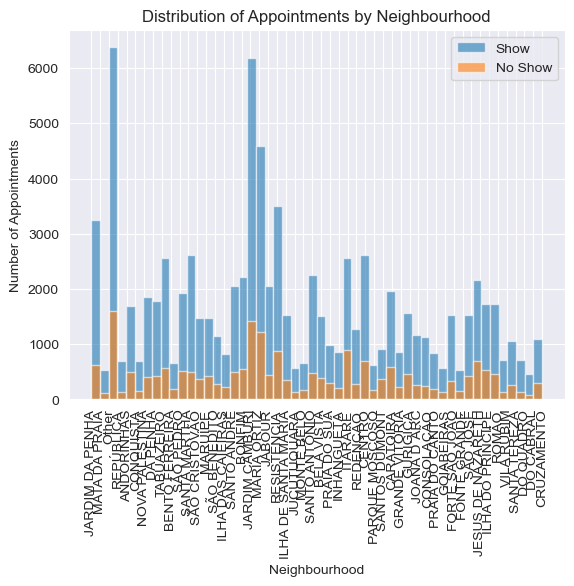

In [92]:
df.Neighbourhood[show].hist(alpha= 0.6, bins=52, label='Show')
df.Neighbourhood[noshow].hist(alpha= 0.6, bins=52, label='No Show')
plt.title('Distribution of Appointments by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Appointments')
plt.legend();

In [93]:
df.groupby('Neighbourhood',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
Neighbourhood,,
ANDORINHAS,77.347311,22.652689
BELA VISTA,79.936642,20.063358
BENTO FERREIRA,77.868852,22.131148
BONFIM,80.152119,19.847881
CARATOÍRA,77.056277,22.943723
CENTRO,79.003021,20.996979
CONQUISTA,81.345927,18.654073
CONSOLAÇÃO,82.821637,17.178363
CRUZAMENTO,78.370584,21.629416


In [94]:
df_multiday.groupby('Neighbourhood',observed=True)['NoShow'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
Neighbourhood,,
AEROPORTO,80.000000,20.000000
ANDORINHAS,68.035592,31.964408
ANTÔNIO HONÓRIO,76.111111,23.888889
ARIOVALDO FAVALESSA,67.052023,32.947977
BARRO VERMELHO,72.183099,27.816901
BELA VISTA,71.052632,28.947368
BENTO FERREIRA,72.519084,27.480916
BOA VISTA,75.113122,24.886878
BONFIM,69.888038,30.111962


I will examine ApptWeekday and SchedWeekday next

Text(0, 0.5, 'Number of Appointments')

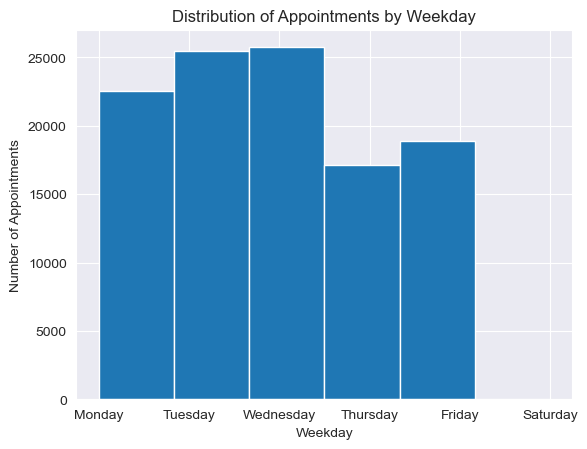

In [95]:
df.ApptWeekday.hist(bins=6)
plt.title('Distribution of Appointments by Weekday')
plt.xlabel('Weekday')
plt.xticks((0, 1, 2, 3, 4, 5), ('Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'))
plt.ylabel('Number of Appointments')

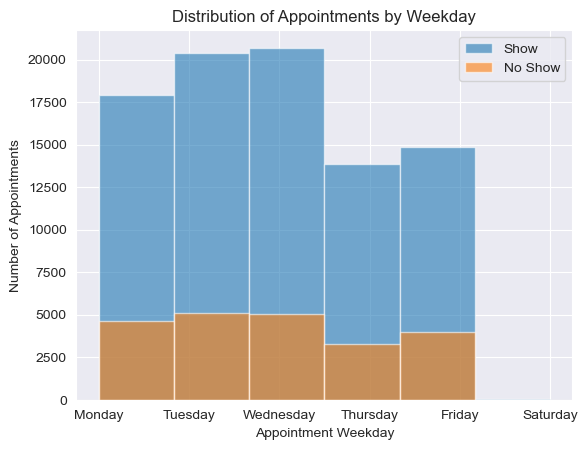

In [96]:
df.ApptWeekday[show].hist(alpha= 0.6, bins=6, label='Show')
df.ApptWeekday[noshow].hist(alpha= 0.6, bins=6, label='No Show')
plt.title('Distribution of Appointments by Weekday')
plt.xlabel('Appointment Weekday')
plt.xticks((0, 1, 2, 3, 4, 5), ('Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'))
plt.ylabel('Number of Appointments')
plt.legend();

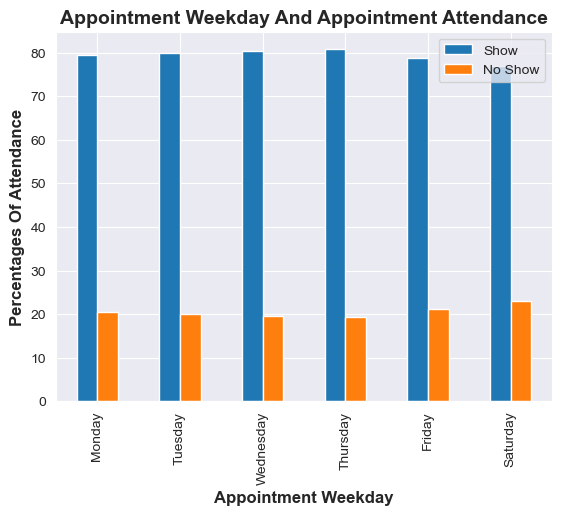

In [97]:
bar_graph(df,'NoShow', 'ApptWeekday',  'Percentages', 'Appointment Weekday')
plt.xticks((0, 1, 2, 3, 4, 5), ('Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'));

In [98]:
df.groupby(['NoShow', 'ApptWeekday'],observed=True).count()['PatientID']

NoShow  ApptWeekday
0       0              17938
        1              20408
        2              20691
        3              13862
        4              14874
        5                 30
1       0               4634
        1               5102
        2               5053
        3               3311
        4               3991
        5                  9
Name: PatientID, dtype: int64

In [99]:
df.groupby('ApptWeekday', observed= True)['NoShow'].value_counts(normalize=True).unstack('NoShow')

NoShow,0,1
ApptWeekday,,
0,0.794701,0.205299
1,0.800000,0.200000
2,0.803721,0.196279
3,0.807197,0.192803
4,0.788444,0.211556
5,0.769231,0.230769


In [100]:
df_multiday.groupby('ApptWeekday', observed= True)['NoShow'].value_counts(normalize=True).unstack('NoShow')

NoShow,0,1
ApptWeekday,,
0,0.698851,0.301149
1,0.714268,0.285732
2,0.728953,0.271047
3,0.728072,0.271928
4,0.706633,0.293367
5,0.709677,0.290323


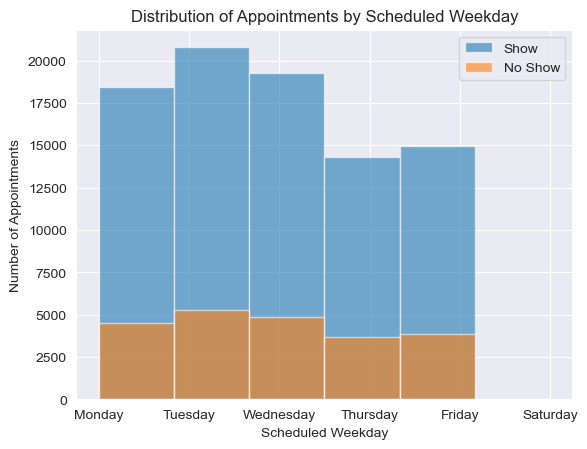

In [101]:
df.SchedWeekday[show].hist(alpha= 0.6, bins=6, label='Show')
df.SchedWeekday[noshow].hist(alpha= 0.6, bins=6, label='No Show')
plt.title('Distribution of Appointments by Scheduled Weekday')
plt.xlabel('Scheduled Weekday')
plt.xticks((0, 1, 2, 3, 4, 5), ('Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'))
plt.ylabel('Number of Appointments')
plt.legend();

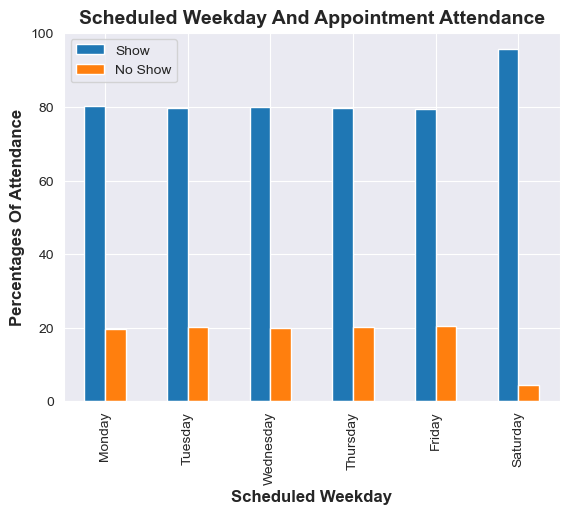

In [102]:
bar_graph(df,'NoShow', 'SchedWeekday',  'Percentages', 'Scheduled Weekday')
plt.xticks((0, 1, 2, 3, 4, 5), ('Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'));

In [103]:
df.groupby(['NoShow', 'SchedWeekday'],observed=True).count()['PatientID']

NoShow  SchedWeekday
0       0               18439
        1               20786
        2               19295
        3               14294
        4               14967
        5                  22
1       0                4512
        1                5262
        2                4838
        3                3653
        4                3834
        5                   1
Name: PatientID, dtype: int64

In [104]:
df.groupby('SchedWeekday', observed= True)['NoShow'].value_counts(normalize=True).unstack('NoShow')

NoShow,0,1
SchedWeekday,,
0,0.803407,0.196593
1,0.797988,0.202012
2,0.799528,0.200472
3,0.796456,0.203544
4,0.796075,0.203925
5,0.956522,0.043478


In [105]:
df_multiday.groupby('SchedWeekday', observed= True)['NoShow'].value_counts(normalize=True).unstack('NoShow')

NoShow,0,1
SchedWeekday,,
0,0.714777,0.285223
1,0.713897,0.286103
2,0.714491,0.285509
3,0.717146,0.282854
4,0.717859,0.282141
5,0.933333,0.066667


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109903 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientID         109903 non-null  object             
 1   Gender            109903 non-null  int64              
 2   ScheduledDay      109903 non-null  datetime64[ns, UTC]
 3   AppointmentDay    109903 non-null  datetime64[ns, UTC]
 4   Age               109903 non-null  int64              
 5   Neighbourhood     109903 non-null  object             
 6   Scholarship       109903 non-null  int64              
 7   Hipertension      109903 non-null  int64              
 8   Diabetes          109903 non-null  int64              
 9   Alcoholism        109903 non-null  int64              
 10  Handcap           109903 non-null  int64              
 11  SMSReceived       109903 non-null  int64              
 12  NoShow            109903 non-null  int64         

In [107]:
df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,ApptWeekday,SchedWeekday,DateInterval,ComorbidityScore,CountNoShow,ApptCount,NoShowRate
0,2944076405156631,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,0,1,0,2,0.0
1,7786344176630077,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,0,0,0,2,0.0
2,4300258968658637,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,0,0,0,2,0.0
3,6000032656652126,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,Other,0,0,0,0,0,0,0,4,4,0,0,1,2,0.5
4,9716721353700278,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,0,2,0,1,0.0


Finally, I will examine SMSRecieved

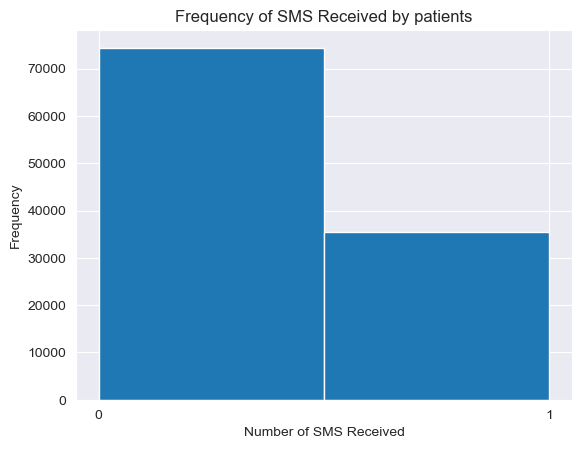

In [108]:
df['SMSReceived'].plot(kind='hist', bins= 2, use_index=True, xticks=([0,1]) )
plt.title('Frequency of SMS Received by patients')
plt.xlabel('Number of SMS Received')
plt.ylabel('Frequency');

In [109]:
df.groupby('NoShow',observed=True)['SMSReceived'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
SMSReceived,,
0,70.732207,55.728507
1,29.267793,44.271493


In [110]:
df_sameday= df[df['DateInterval'] == 0]

In [111]:
df_sameday['SMSReceived'].value_counts()

SMSReceived
0    38494
Name: count, dtype: int64

Sameday appointments do not recieve SMS Reminders, I will exclude them to explore SMSReceived compared to No Shows.

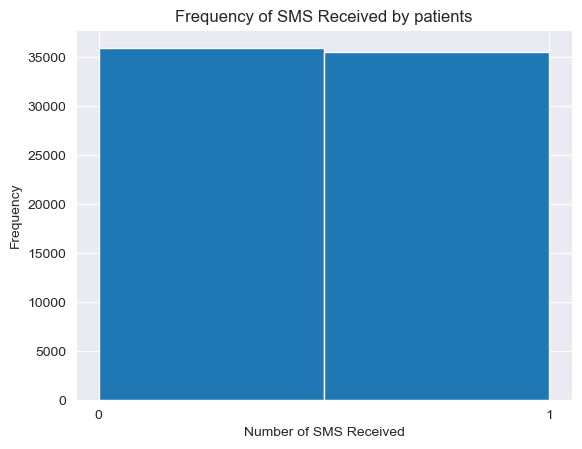

In [112]:
df_multiday['SMSReceived'].plot(kind='hist', bins= 2, use_index=True, xticks=([0,1]) )
plt.title('Frequency of SMS Received by patients')
plt.xlabel('Number of SMS Received')
plt.ylabel('Frequency');

In [113]:
sms_rate= df_multiday[df_multiday['SMSReceived'] == 1].count()/df_multiday['SMSReceived'].count()
sms_rate.Gender

0.4968841462560742

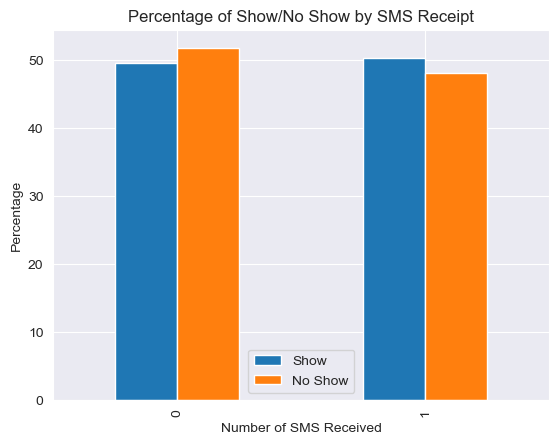

In [114]:
df_multiday.groupby('NoShow',observed=True)['SMSReceived'].value_counts(normalize=True).mul(100).unstack('NoShow').plot.bar()
plt.title('Percentage of Show/No Show by SMS Receipt')
plt.xlabel('Number of SMS Received')
plt.ylabel('Percentage')
plt.legend(['Show', 'No Show']);

In [115]:
df_multiday.groupby('NoShow',observed=True)['SMSReceived'].value_counts(normalize=True).mul(100).unstack('NoShow')

NoShow,0,1
SMSReceived,,
0,49.702497,51.843284
1,50.297503,48.156716


As I completed EDA, these columns are no longer needed and will be dropped before preparing the data for machine learning. 

In [116]:
#These columns are not needed for the ML Model
df.drop(['ScheduledDay', 'AppointmentDay', 'CountNoShow', 'ApptCount', 'PatientID'], axis=1, inplace=True )


<a id='eda_sum'></a>

Observations from EDA:
- The overall no show rate is 20.1% for the entire data set. The overall no show rate for same day appointments is 4.6%. The overall no show rate for multiday appointments is 28%. 
- There are many appointments with an age of 0, but this does not seem unusual as infants are recommended to have many appointments in their first year of life.     
- Some ages had higher than average no show rates, age could be a factor in the prediction of no shows. 
- For appointments with date interval of 0, also known as same day appointments, the no show rate is only 4.63, compared to higher rates at greater intervals.  These results could cause bias or skew the outcome of a machine learning model, and I will run models that include 0 day and do not include 0 day and compare their outputs.  It appears greater date intervals have higher no show rates, and this could be a factor in prediction of no shows. 
- There are some neighbourhoods in this dataset that appear very few times,  I combined those that appeared less than 0.5% of the time into one group called "Other".   This reduced the number of neighbourhoods from 81 to 52.
- There are some neighbourhoods with higher than average No Show rates, those grouped into "Other" have a slightly lower no show rate thant the average, so grouping these smaller neighbourhoods together should have minimal impact on the final ML model. There are a few neighbourhoods with higher than average no show rates. 
- There does not appear to be a significant difference in NoShow rates based on the Weekday of the Appointment or the date it was scheduled.  There are very few appointments scheduled on or for a Saturday, though appointments Scheduled on a Saturday had a low No Show rate, there were only 22 appointments in this dataset that were scheduled *on* a Saturday, and only 39 appointments that were scheduled *for* a Saturday.  These may represent urgent appointments or data entry errors. The clinics normal working hours are not provided in this dataset.  When examining the data with sameday appointments excluded, the rate of no shows had similarly small variations in no show rate by weekday.
- Only 49.7% of appointments that were scheduled in advance recieved an SMS reminder for their appointment. Same day appointments did not recieve SMS reminders, and were excluded during my exploration of the impact of SMS reminders.   There is a 3.7% reduction in no shows among those patients who did recieve an SMS. 


Code references:
- [Replace Neighbourhood name with 'Other']( https://stackoverflow.com/questions/64435983/replace-the-values-in-a-column-based-on-frequency)
- [Cut column values into bins with set intervals](https://stackoverflow.com/questions/55204418/how-to-rename-categories-after-using-pandas-cut-with-intervalindex)

<a href="#top">Back to Table of Contents</a>

<a id='machinelearning'></a>
### Machine Learning

<a href="#ML_sum">Jump to summary of Machine Learning</a>


<a href="#top">Back to Table of Contents</a>

#### Preparing the data for a supervised ML model

In [117]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def model_preprocessing(data):
    scaler = StandardScaler() 

    numerical = ['Age', 'DateInterval', 'NoShowRate']
    
    ohe=OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
    features_transform=ohe.fit_transform(data[['Neighbourhood']])
    data= pd.concat([data,features_transform], axis=1).drop(columns=['Neighbourhood'])

    data[numerical]= scaler.fit_transform(data[numerical])
    
    
    noshow = data['NoShow']
    features_final= data.drop('NoShow', axis=1)
    
    return features_final, noshow, ohe, scaler


The full data will be modeled, as will the data excluding sameday appointments (those excluding same day appointments are labeled with _m or _multi or _multiday)


Full Data

In [118]:
X,y, ohe, scaler=model_preprocessing(df)


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

Data excluding Same Day

To ensure the df_multiday dataframe is the same as the full dataframe other than the removal of the 0 date interval, I am creating it again here from the df dataframe to account for any changes that were made to df since df_multiday was created. 

Multiday is fed to the  same preprocessing function applied as the full data set, and train/test split in the same way. 

In [120]:
df_multiday=df[df['DateInterval'] > 0]


In [121]:
X_multi,y_multi, ohe_m, scaler_m=model_preprocessing(df_multiday)

In [122]:
X_train_m, X_test_m, y_train_m, y_test_m= train_test_split(X_multi,y_multi, test_size=0.3, random_state=0)

#### Model Selection and Evaluating Model Performance

In [123]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_pipeline= []
model_pipeline.append(RandomForestClassifier(max_depth=10))
model_pipeline.append(DecisionTreeClassifier(max_depth=10))
model_pipeline.append(KNeighborsClassifier())

In [124]:
model_list=['Random Forest',  'Decision Tree', 'K Nearest Neighbors']

prec_list=[]
recall_list=[]
f_score_list=[]

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for model in model_pipeline:
    model.fit(X_train, y_train)

    y_pred_test=model.predict(X_test)
    prec_list.append(metrics.precision_score(y_test, y_pred_test))
    recall_list.append(metrics.recall_score(y_test, y_pred_test))
    f_score_list.append(metrics.f1_score(y_test, y_pred_test))
    

    print(model)

RandomForestClassifier(max_depth=10)
DecisionTreeClassifier(max_depth=10)
KNeighborsClassifier()


In [125]:
results= pd.DataFrame({'Model': model_list, 'Precision': prec_list , 'Recall': recall_list,'F-score':f_score_list })

In [126]:
results

,Model,Precision,Recall,F-score
0,Random Forest,0.825989,0.713834,0.765827
1,Decision Tree,0.796103,0.756435,0.775762
2,K Nearest Neighbors,0.809619,0.668975,0.732608


In [127]:
model_list_m=['Random Forest',  'Decision Tree', 'K Nearest Neighbors']

prec_list_m=[]
recall_list_m=[]
f_score_list_m=[]


for model in model_pipeline:
    model.fit(X_train_m, y_train_m)

    y_pred_test_m=model.predict(X_test_m)

    prec_list_m.append(metrics.precision_score(y_test_m, y_pred_test_m))
    recall_list_m.append(metrics.recall_score(y_test_m, y_pred_test_m))
    f_score_list_m.append(metrics.f1_score(y_test_m, y_pred_test_m))
    

    print(model)

RandomForestClassifier(max_depth=10)
DecisionTreeClassifier(max_depth=10)
KNeighborsClassifier()


In [128]:
results_multi= pd.DataFrame({'Model': model_list_m, 'Precision': prec_list_m , 'Recall': recall_list_m,'F-score':f_score_list_m })

In [129]:
results_multi

,Model,Precision,Recall,F-score
0,Random Forest,0.780565,0.813548,0.796715
1,Decision Tree,0.788758,0.782144,0.785437
2,K Nearest Neighbors,0.809835,0.712101,0.757830


It appears the RandomForestClassifier will be a good model for this data, with the highest F score on the multiday set. 



#### Evaluate and Tune Model

In [130]:
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay
def test_models(clf, X_train, X_test, y_train, y_test):
    clf=clf
    clf.fit(X_train, y_train)
    y_fit=clf.predict(X_train)
    y_pred = clf.predict(X_test)

    print("Precision Score",metrics.precision_score(y_test, y_pred))
    print("Recall Score",metrics.recall_score(y_test, y_pred))
    print("F-score",metrics.f1_score(y_test, y_pred))
    print()
    print(metrics.classification_report(y_test, y_pred))
    
    
    print('Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    display= ConfusionMatrixDisplay(cm, display_labels=clf.classes_) 
    display.plot()
    plt.show()
    


In [131]:
#This model tuning code was adapted from the Udacity Supervised Machine Learning course. 
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

def model_tuning(clf, parameters,X_train, y_train, X_test, y_test):

    #  f_score scoring object 
    scorer = make_scorer(f1_score)

    # Perform grid search 
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=3)

    # Fit the grid search object
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    y_fit=best_clf.predict_proba(X_train)[:,1]
    y_pred_prob = best_clf.predict_proba(X_test)[:, 1] 

    
    # Report the before-and-afterscores
    print('')
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
    print("Precision score on testing data: {:.4f}".format(metrics.precision_score(y_test, predictions)))
    print("Recall Score on the testing data",metrics.recall_score(y_test, predictions))
    print("F score on testing data: {:.4f}".format(metrics.f1_score(y_test, predictions)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(metrics.accuracy_score(y_test, best_predictions)))
    print("Final precision score on the testing data: {:.4f}".format(metrics.precision_score(y_test, best_predictions)))
    print("Final recall Score on the testing data",metrics.recall_score(y_test, best_predictions))
    print("Final F score on the testing data: {:.4f}".format(metrics.f1_score(y_test, best_predictions)))

    
    print('Best Parameters:', grid_fit.best_params_)
    print()
    print("Classification Report:")
    print(classification_report(y_test,best_predictions))
    
    print("Confusion Matrix:")
    cm= confusion_matrix(y_test,best_predictions, labels=clf.classes_)
    display= ConfusionMatrixDisplay(cm, display_labels=clf.classes_) 
    display.plot()
    plt.show()



In [132]:
parameters =  {'n_estimators': [150,200], 'max_depth':[5,6], 'min_samples_split': [2,4],'max_features':[38,40]}
clf= RandomForestClassifier(random_state=42)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=150;, score=0.778 total time=   5.4s
[CV 2/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=150;, score=0.786 total time=   5.4s
[CV 3/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=150;, score=0.788 total time=   5.5s
[CV 4/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=150;, score=0.790 total time=   5.2s
[CV 5/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=150;, score=0.789 total time=   5.4s
[CV 1/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=200;, score=0.778 total time=   7.0s
[CV 2/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=200;, score=0.787 total time=   7.3s
[CV 3/5] END max_depth=5, max_features=38, min_samples_split=2, n_estimators=200;, score=0.788 total time=   6.9s
[CV 4/5] END max_depth=5, m

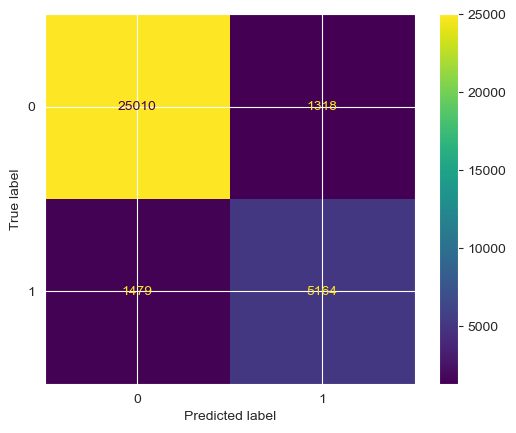

In [133]:
model_tuning(clf, parameters,X_train, y_train, X_test, y_test)

In [134]:
clf= RandomForestClassifier(n_estimators= 200, max_depth=6, min_samples_split=4, max_features=40, random_state=42)

Precision Score 0.7966676951558161
Recall Score 0.7773596266746952
F-score 0.7868952380952381

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     26328
           1       0.80      0.78      0.79      6643

    accuracy                           0.92     32971
   macro avg       0.87      0.86      0.87     32971
weighted avg       0.91      0.92      0.91     32971

Confusion Matrix


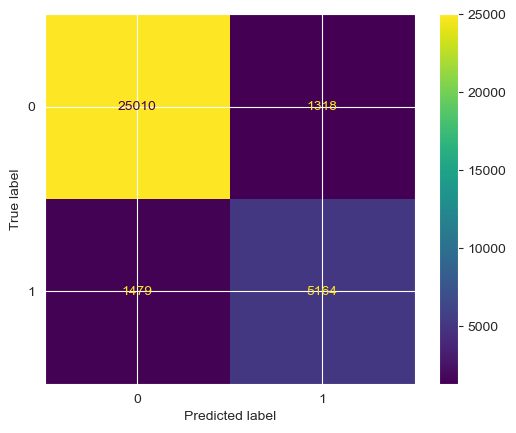

In [135]:
full_test= test_models(clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=50;, score=0.806 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=50;, score=0.805 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=50;, score=0.814 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=50;, score=0.790 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=150;, score=0.805 total time=   1.7s
[CV 2/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=150;, score=0.807 total time=   1.7s
[CV 3/5] END max_depth=5, max_features=15, min_samples_split=2, n_estimators=150;, score=0.817 total time=   1.7s
[CV 4/5] END max_depth=5, max_fea

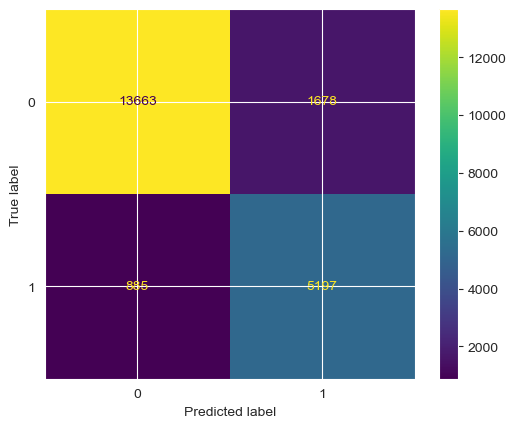

In [136]:
parameters_m =  {'n_estimators': [50,150], 'max_depth':[5], 'min_samples_split': [2,3],'max_features':[15,38]}
clf_m= RandomForestClassifier(random_state=42)
model_tuning(clf_m, parameters_m, X_train_m,  y_train_m, X_test_m, y_test_m)

Precision Score 0.7559272727272728
Recall Score 0.8544886550476817
F-score 0.8021918654009416

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     15341
           1       0.76      0.85      0.80      6082

    accuracy                           0.88     21423
   macro avg       0.85      0.87      0.86     21423
weighted avg       0.89      0.88      0.88     21423

Confusion Matrix


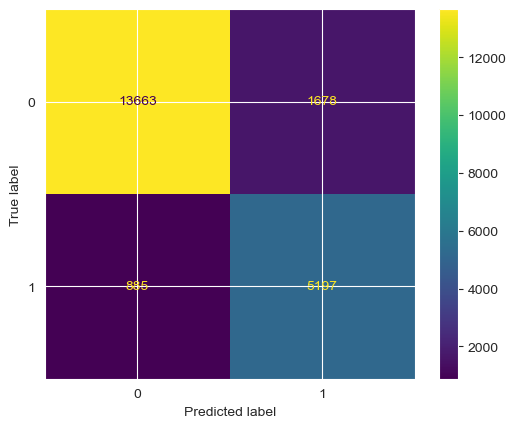

In [137]:
clf_m= RandomForestClassifier(n_estimators= 150, max_depth=5, min_samples_split=3, max_features=15, random_state=42)
multiday_test=test_models(clf_m, X_train_m, X_test_m, y_train_m, y_test_m)

Fitting final model.

In [138]:
clf_m= RandomForestClassifier(n_estimators= 150, max_depth=5, min_samples_split=3, max_features=15, random_state=42)
clf_m.fit(X_train_m, y_train_m)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_split=3,
                       n_estimators=150, random_state=42)

In [139]:
clf= RandomForestClassifier(n_estimators= 200, max_depth=6, min_samples_split=4, max_features=40, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=40, min_samples_split=4,
                       n_estimators=200, random_state=42)

#### Feature Importances


In [140]:
def feature_importance(clf,X_train, y_train):
    model = clf.fit(X_train, y_train)

    #Extract feature importances
    importances = model.feature_importances_
    num_features = pd.Series(model.feature_importances_, index=X_train.columns)
    num_features.sort_values(ascending= False, inplace=True)
    
    print (num_features.head(20))
    
    # The below code comes from Udacity Supervised ML Course visuals.py with minimal alterations. 
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]


    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()  

NoShowRate                      0.901527
DateInterval                    0.086735
SMSReceived                     0.004252
Age                             0.003387
Gender                          0.000561
ApptWeekday                     0.000420
SchedWeekday                    0.000411
Neighbourhood_SANTOS DUMONT     0.000184
Scholarship                     0.000154
Neighbourhood_BELA VISTA        0.000148
ComorbidityScore                0.000146
Hipertension                    0.000088
Handcap                         0.000086
Neighbourhood_JABOUR            0.000084
Neighbourhood_CARATOÍRA         0.000081
Alcoholism                      0.000077
Neighbourhood_DA PENHA          0.000070
Neighbourhood_CONQUISTA         0.000065
Neighbourhood_Other             0.000061
Neighbourhood_GRANDE VITÓRIA    0.000058
dtype: float64


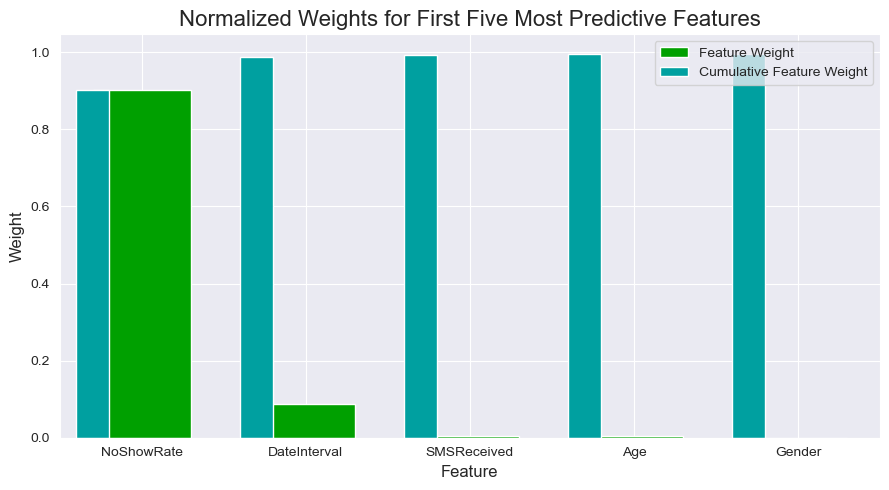

In [141]:
feature_importance(clf,X_train, y_train)

NoShowRate                         0.942912
Age                                0.021132
DateInterval                       0.017097
Scholarship                        0.003244
Hipertension                       0.002635
SMSReceived                        0.001793
Neighbourhood_JESUS DE NAZARETH    0.001751
ComorbidityScore                   0.001569
Neighbourhood_ITARARÉ              0.000854
Neighbourhood_JARDIM DA PENHA      0.000684
ApptWeekday                        0.000684
Neighbourhood_GURIGICA             0.000554
SchedWeekday                       0.000426
Alcoholism                         0.000411
Neighbourhood_ILHA DO PRÍNCIPE     0.000365
Neighbourhood_FORTE SÃO JOÃO       0.000320
Handcap                            0.000272
Gender                             0.000237
Neighbourhood_ANDORINHAS           0.000191
Neighbourhood_JARDIM CAMBURI       0.000163
dtype: float64


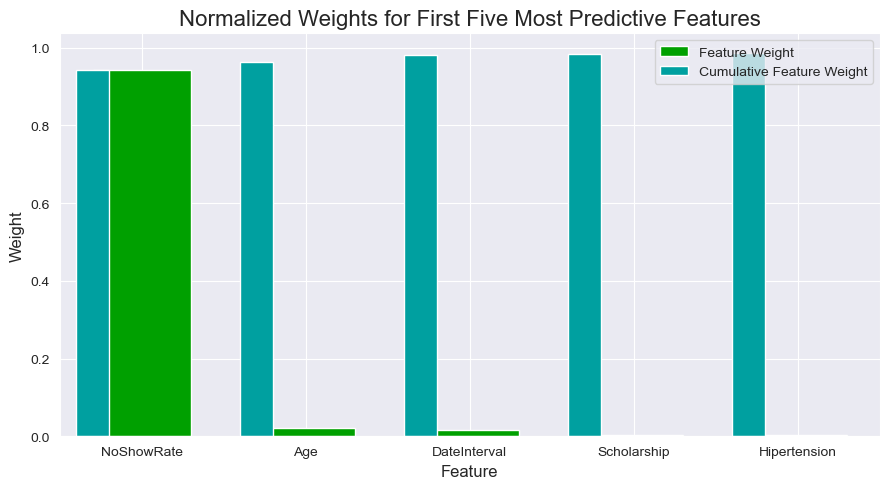

In [142]:
feature_importance(clf_m,X_train_m, y_train_m)

<a id='ML_sum'></a>
Summary of Machine Learning steps:

- I prepared the data by using StandardScaler to scale 3 numerial columns : Age, DateInterval, and NoShowRate
- I used One Hot Encoding to transform the Neighbourhood feature into seperate features for each neighbhorhood. 
- I split the dataframe into X and y, where y is the target variable.  I repeated this for df_multiday, which excludes same day appointments. 
- I used train_test_split to split the above datasets into 70% training, 30% testing.  
- I created a pipeline to test 3 algorithms (I tested many more, but these 3 were best performing for this project), and of these I selected Random Forest as it had the highest F-scores for both data sets. 
- I tuned the hyperparameters for Random Forest for each data set (df and df_multiday) and selected the best for each data set.
- I fit each dataframe's chosen model and printed the Precision, Recall and F-scores as well as the classification report and confusion matrices. 
- I extracted feature importances from each dataframe's model
- For the final predictive model, I chose to use the df_multiday model as it excludes the same day appointments that represent 35% of the full data set with a significantly lower relative no show rate of 4.6% vs 28.5% for the multiday appointments. 

    

Code References:
- [OneHotEncoder](https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe)
- [Model Pipeline and Scoring](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)
- [Printing Top X Feature Importances](https://stackoverflow.com/questions/69305475/how-to-display-top-10-feature-importance-for-random-forest)

<a href="#top">Back to Table of Contents</a>

<a id='testing'></a>
### Testing the model and making predictions


I created a function to prepate the data in the correct format for the model to make predictions, and created a second function that makes the prediction of 'Show' or 'No Show' and provided the probability of a No Show. 

I created 3 test patients below to make predictions.  

<a href="#top">Back to Table of Contents</a>
    

In [143]:
#Ensuring the correct model is fitted
clf=RandomForestClassifier(n_estimators= 150, max_depth=5, min_samples_split=3, max_features=15, random_state=42)
clf.fit(X_train_m, y_train_m)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_split=3,
                       n_estimators=150, random_state=42)

In [144]:
def prepare_test_data(df):
    pd.options.mode.copy_on_write = True
    
    #Renaming columns to match naming convention in other columns
    df.rename(columns={'SMS_received': 'SMSReceived'}, inplace=True)
    df.rename(columns={'No-show': 'NoShow'}, inplace=True)
    df.rename(columns={'PatientId': 'PatientID'}, inplace=True)
    
    #Convert ScheduledDay and AppointmentDay to datetime datatype
    df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
    df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
    
    #Ensure only ages of 0 or greater are included in the incoming data
    df= df[df['Age'] >= 0]

    #Drop AppointmentID column
    df.drop(['AppointmentID'], axis=1, inplace=True )

    #Encode Gender to 0 and 1 for F and M
    df['Gender']=df.Gender.replace(to_replace=['F', 'M'], value=[0, 1])  
    
    #Setting the times to 00:00 as one column uses actual times and the other only uses 00:00
    df['AppointmentDay']=df['AppointmentDay'].dt.floor('d')
    df['ScheduledDay']=df['ScheduledDay'].dt.floor('d')   
    
    #Creating Appointment and Scheduled Weekday features    
    df['ApptWeekday'] = df['AppointmentDay'].dt.dayofweek  
    df['SchedWeekday'] = df['ScheduledDay'].dt.dayofweek
    
    #Create DateInterval Column
    df['DateInterval']=(df['AppointmentDay']-df['ScheduledDay']).dt.days
       
    #Create Comorbidity Score
    df['ComorbidityScore'] = df['Hipertension'] + df['Diabetes']+ df['Alcoholism']+ df['Handcap']

    #Create No Show Rate
    df['CountNoShow']= df['CountNoShow']
    df['ApptCount']= df['ApptCount']
    df['NoShowRate']=  df['CountNoShow']/df['ApptCount']
    
    
    return df
    

In [145]:
def patient_test_predict(test_patient, scaler):

    df=pd.DataFrame(test_patient, index=[0])
    
    df=prepare_test_data(df)

    df.drop(['ScheduledDay', 'AppointmentDay','CountNoShow','ApptCount', 'PatientID'], axis=1, inplace=True )
    
    
    numerical = ['Age', 'DateInterval', 'NoShowRate']
    df[numerical]= scaler.transform(df[numerical])
    
    features_transform_test=ohe.transform(df[['Neighbourhood']])
    X_test= pd.concat([df,features_transform_test], axis=1).drop(columns=['Neighbourhood'])
    y_pred= clf.predict(X_test)
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1] 
    
    if y_pred == 1:
        print('This patient is likely to no show.')
        for v in y_pred_prob:
            v= v * 100
            print('The likelihood of no show is {:.2f} %'.format(v))
    else:
        print('This patient is likely to show.')
        for v in y_pred_prob:
            v= v * 100
            print('The likelihood of no show is {:.2f} %'.format(v))
        
    




In [146]:
test_patient= {
                'PatientId': 554211956145729.0,
                'AppointmentID': 7542345,
                'Gender': 'M',
                'ScheduledDay': ('2016-04-29T12:30:56Z'), 
                'AppointmentDay': ('2016-05-02T00:00:00Z'),
                'Age': 80,
                'Neighbourhood': 'CONQUISTA',
                'Scholarship': 0,
                'Hipertension': 1,
                'Diabetes': 1,
                'Alcoholism': 0,
                'Handcap': 0,
                'SMS_received': 0,
                'CountNoShow': 0,
                'ApptCount': 0
                
                 }


In [147]:
patient=patient_test_predict(test_patient, scaler_m)

This patient is likely to show.
The likelihood of no show is 8.09 %


In [148]:
test_patient2= {
                'PatientId': 154211953745729.0,
                'AppointmentID': 7542653,
                'Gender': 'F',
                'ScheduledDay': ('2016-04-23T12:30:56Z'), 
                'AppointmentDay': ('2016-05-15T00:00:00Z'),
                'Age': 10,
                'Neighbourhood': 'SÃO JOSÉ',
                'Scholarship': 0,
                'Hipertension': 0,
                'Diabetes': 0,
                'Alcoholism': 0,
                'Handcap': 0,
                'SMS_received': 0,
                'CountNoShow': 4,
                'ApptCount': 10
                 }

In [149]:
patient2=patient_test_predict(test_patient2, scaler_m)

This patient is likely to no show.
The likelihood of no show is 60.28 %


In [150]:
test_patient3= {
                'PatientId': 174223953745729.0,
                'AppointmentID': 7577653,
                'Gender': 'F',
                'ScheduledDay': ('2016-03-01T12:30:56Z'), 
                'AppointmentDay': ('2016-06-25T00:00:00Z'),
                'Age': 16,
                'Neighbourhood': 'SÃO PEDRO',
                'Scholarship': 1,
                'Hipertension': 0,
                'Diabetes': 1,
                'Alcoholism': 0,
                'Handcap': 1,
                'SMS_received': 0,
                'CountNoShow': 1,
                'ApptCount': 15
                 }

In [151]:
patient3=patient_test_predict(test_patient3, scaler_m)

This patient is likely to show.
The likelihood of no show is 15.96 %


<a id='conclusions'></a>

### Conclusions

The success of the produced machine learning model was evaluated by an F-score. The F-score is a balanced score between precision and recall metrics and is the ideal performance metric when there is an imbalance between classes in the data set, such as this one where the groups of show and no-show are unequal.   
These metrics identify how often the model classifies appointment attendance correctly.  High recall scores signify the proportion of actual no show appointments that were successfully predicted as no shows, while high precision indicates rate of the model’s  predictions of no shows that were correct.  In this project, a balance of recall and precision are ideal, as both false positive and false negative predictions have negative impacts on productivity.   If a patient were to be predicted to be a no-show but did attend their appointment it could lead to longer wait times and strained resources.  Conversely, patients predicted to attend but do not lead to wasted resources. 

An F-score of  0.75 or greater is the target success metric for this model.  

The final tuned model for the data set including same day appointments had an F -score of 0.79.   This model meets the success criteria.     Additionally, a recall score was calculated at 0.78 and precision at 0.80.   

The final tuned model for the data set excluding same day appointments had an F-score of 0.80, recall 0.85, and precision of 0.76.  

Both models performed well and met success criteria, and would benefit facilties seeking to predict no shows.  As the no show rate is quite low for same day appointments, around 4.6%, compared to the overall no show rate for appointments booked in advance, 28.5%,  the final model will exclude same day appointments to remove the potential bias from this imbalance in feature importances.  As 94% of patients with same day appointments do attend their appointments, it is better to be able to predict the much larger population of no-shows that occur on non same-day appointments. 

The hypothesis of this project was that the date interval will be a significant feature in the machine-learning prediction of a no-show appointment.  The feature importances extracted from the model do support the hypothesis that the date interval is a feature in the machine learning prediction of a no show.  However, the date interval was not the most significant feature importance identified by the model and ranked third on the list of feature importances.   The most significant feature importance, when same day appointments were excluded, was the historical no show rate for the patient and this feature is by far the dominant result with a normalized weight of 0.942. The patients that have previously no showed are most predictive of subsequent no shows in this model.   The second most important feature was patient age with a normalized weight of 0.021. The date interval was ranked third, with a normalized weight of 0.017.   The next two, Scholarship and Hypertension, had a normalized weight of 0.0032 and 0.0026 respectively.    When all date intervals are included in the model, there is a larger importance placed on date interval, placing it second with a normalized weight of 0.135, while no show rate remains most significant at 0.83.  I believe this difference is due to the same day appointments that represent 35% of the data set and have a relatively low no-show rate of 4.6%,  and this is skewing feature importance. Additionally, these same day appointments do not receive SMS messages and this disproportionality may also skew the significance of SMS messages on appointment attendance.   For this reason, I have chosen the final model to exclude same day appointments.  

The final model was tested by creating test patient information and using the model to make a prediction. The model makes a prediction if the patient is likely to show or no show, and the displays predicted probability of a no show occuring.  

<a href="#top">Back to Table of Contents</a>
